## ES 335 Pre-requisite Exam
### - Kushal Bhavesh Rathod 22110128


### Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


If we have two matrices one (n,k) [$a_{p,q}$] and other (k,m) [$b_{q,r}$] , consider a general element of the product $C_{p,r}$, that will be <br>
$$
c_{p,r} = \sum_{q=1}^{k} a_{p,q}\times b_{q,r}
$$
So one element required,
k multiplications and k-1 sums, <br>
therefore, $n \times m$ elements would require:<br>
$n\times m \times k$ sums and<br>
$n\times m \times (k-1)$ multiplications.

### Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import numpy as np
from time import time

A = np.random.rand(3,4)*5 # *5 to have all elements in range [0,5)
B = np.random.rand(4,6)*5 # *5 to have all elements in range [0,5)

def matrix_multiply(A,B):
    n = len(A)
    k1 = len(A[0])
    k2 = len(B)
    m = len(B[0])
    if k1 != k2:
      return Exception("can only multiply (n,k) by (k,m)")
    k = k1
    res = [[0 for _ in range(m)] for _ in range(n)]
    for p in range(n):
      for r in range(m):
        c_pr = 0
        for q in range(k):
          c_pr += A[p][q] * B[q][r]
        res[p][r] = c_pr
    return res
s = time()
answer = matrix_multiply(A,B)
print(f'Manual multiply took {round((time()-s)*1000,5)} ms')
manual_answer = np.array(answer) # for better printing and equality check
print(manual_answer)
print()
s = time()
numpy_answer = np.matmul(A,B)
print(f'Numpy multiply took {round((time()-s)*1000,5)} ms')
print(numpy_answer)
print()
# check equality
print(f'A and B are equal: {np.allclose(manual_answer,numpy_answer)}')


Manual multiply took 0.27037 ms
[[49.88915171 33.5574764  37.30209087 30.7712988  40.21560575 44.40565744]
 [39.31134928 21.63102578 24.82683137 14.64072876 35.76124129 32.77306565]
 [60.52837854 42.15783293 44.80353602 36.43478014 52.11497877 55.22014552]]

Numpy multiply took 4.78911 ms
[[49.88915171 33.5574764  37.30209087 30.7712988  40.21560575 44.40565744]
 [39.31134928 21.63102578 24.82683137 14.64072876 35.76124129 32.77306565]
 [60.52837854 42.15783293 44.80353602 36.43478014 52.11497877 55.22014552]]

A and B are equal: True


In most of the cases numpy multiplication seems to be faster.<br>
Reason: Our implementation is O($n^3$) while other algorithms (maybe numpy as well) might be more efficient on the basis of time complexity. [wikipedia reference](https://en.wikipedia.org/wiki/Computational_complexity_of_matrix_multiplication)

### Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?

Assuming we know the length of the list, we can configure our median fucntion find n/2 (incase of even) or (n+1)/2 (incase of odd) element.

This will mean a time complexity of O($n^2$).

Another method is the quickselect method that works in O(n) time complexity.


In [21]:
import numpy as np
import time

def repeated_pass_median(arr):
    arr=list(arr)
    n = len(arr)
    for i in range((n // 2) + 1):
        max_val = max(arr)
        arr.remove(max_val)
    return max_val

def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]

    pivot = arr[len(arr) // 2]
    lows = [el for el in arr if el < pivot]
    highs = [el for el in arr if el > pivot]
    pivots = [el for el in arr if el == pivot]

    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

def quickselect_median(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, n // 2)
    else:
        return 0.5 * (quickselect(arr, n // 2 - 1) + quickselect(arr, n // 2))


ls = [np.random.randint(1,10) for _ in range(5)]# *5 for having elements from one to 5

# Measure time for repeated pass method
lsc = ls[:]
start_time = time.time()
median_repeated_pass = repeated_pass_median(lsc)
time_repeated_pass = time.time() - start_time

# Measure time for quickselect method
lsc = ls[:]
start_time = time.time()
median_quickselect = quickselect_median(lsc)
time_quickselect = time.time() - start_time

# Measure time for numpy median
start_time = time.time()
median_numpy = np.median(ls)
time_numpy = time.time() - start_time

# Print results
print(f"Repeated Pass Median: {median_repeated_pass}, Time: {time_repeated_pass} seconds")
print(f"Quickselect Median: {median_quickselect}, Time: {time_quickselect} seconds")
print(f"Numpy Median: {median_numpy}, Time: {time_numpy} seconds")




Repeated Pass Median: 7, Time: 0.00010156631469726562 seconds
Quickselect Median: 7, Time: 0.00010204315185546875 seconds
Numpy Median: 7.0, Time: 0.0002529621124267578 seconds


### Q4. What is the gradient of the following function with respect to x and y?
$$
f(x,y) = x^2y + y^3sin(x)
$$

Solution:
$$
\frac{\partial f}{\partial x} = 2xy + y^3cos(x)
$$
<br>
$$
\frac{\partial f}{\partial y} = x^2 + 3y^2sin(x)
$$

### Q5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [3]:
try:
  from jax import grad,numpy
except ImportError:
  %pip install "jax[cpu]"
  from jax import grad,numpy

def f(x,y):
  return x**2 * y + y**3 * numpy.sin(x)

def my_df_dx(x,y):
  return 2*x*y + y**3 * numpy.cos(x)


def my_df_dy(x,y):
  return x**2 + 3*y**2 * numpy.sin(x)

sample = np.random.rand(20,2)*5 # *5 for having elements from one to 5
df_dx = grad(f, argnums=0)
df_dy = grad(f, argnums=1)

# testing
jax_grad_matrix = []
my_grad_matrix = []
for i in range(len(sample)):
  jax_grad_matrix.append([df_dx(*sample[i]),df_dy(*sample[i])])
  my_grad_matrix.append([my_df_dx(*sample[i]),my_df_dy(*sample[i])])

# check
jax_grad_matrix = np.array(jax_grad_matrix)
my_grad_matrix = np.array(my_grad_matrix)
print(numpy.allclose(jax_grad_matrix,my_grad_matrix))



True


### Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [4]:
from sympy import *
x, y = symbols('x y')
init_printing(use_unicode=True)


print('df/dx',diff(x**2 * y + y**3 * sin(x),x))
print('df/dy',diff(x**2 * y + y**3 * sin(x),y))
print()
print('These are the same as those obtained in Q4.')

df/dx 2*x*y + y**3*cos(x)
df/dy x**2 + 3*y**2*sin(x)

These are the same as those obtained in Q4.


### Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
  1. Branch 1
    1. Roll Number: 1, Name: N, Marks:
        1. Maths: 100, English: 70 …
  2. Branch 2
2. 2023
  1. Branch 1
  2. Branch 2
3. 2024
  1. Branch 1
  2. Branch 2
4. 2025
  1. Branch 1
  2. Branch 2

In [5]:
data = {
    2022:{
        'Branch 1':[
            {
                'Roll Number': 1,
                'Name': 'N',
                'Marks' : {
                    'Maths':100,
                    'English':70
                }

            }
        ],
        'Branch 2':[],
    },
    2023:{
        'Branch 1':[],
        'Branch 2':[],
    },
    2024:{
        'Branch 1':[],
        'Branch 2':[],
    },
    2025:{
        'Branch 1':[],
        'Branch 2':[],
    }
}

### Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [6]:
class Year:
  def __init__(self,year,branches):
    self.year = year
    self.branches = branches

class Branch:
  def __init__(self,branch_name,students):
    self.name = branch_name
    self.students = students

class Marks:
  def __init__(self,marks_data):
    for k,v in marks_data.items():
      setattr(self,k,v)

class Student:
  def __init__(self,name,roll_no,marks_data):
    self.name = name
    self.roll_no = roll_no
    self.marks = Marks(marks_data)

branch1_placeholder = Branch('Branch 1',[])
branch2_placeholder = Branch('Branch 2',[])

branch1 = Branch('Branch 1',[Student('N', 1, {'Maths':100,'English':70})])

data = [
    Year(2022,[branch1,branch2_placeholder]),
    Year(2023,[branch1_placeholder,branch2_placeholder]),
    Year(2024,[branch1_placeholder,branch2_placeholder]),
    Year(2025,[branch1_placeholder,branch2_placeholder])
]

# suppose we want marks of english of the first student in branch 1 in 2022 year
print(data[0].branches[0].students[0].marks.English)
# similarly for maths
print(data[0].branches[0].students[0].marks.Maths)


70
100


### Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. $y=x$
2. $y=x^2$
3. $y = \frac{x^3}{100}$
4. $y = sin(x)$
5. $y = \frac{sin(x)}{x}$
6. $y = log(x)$
7. $y = e^x$

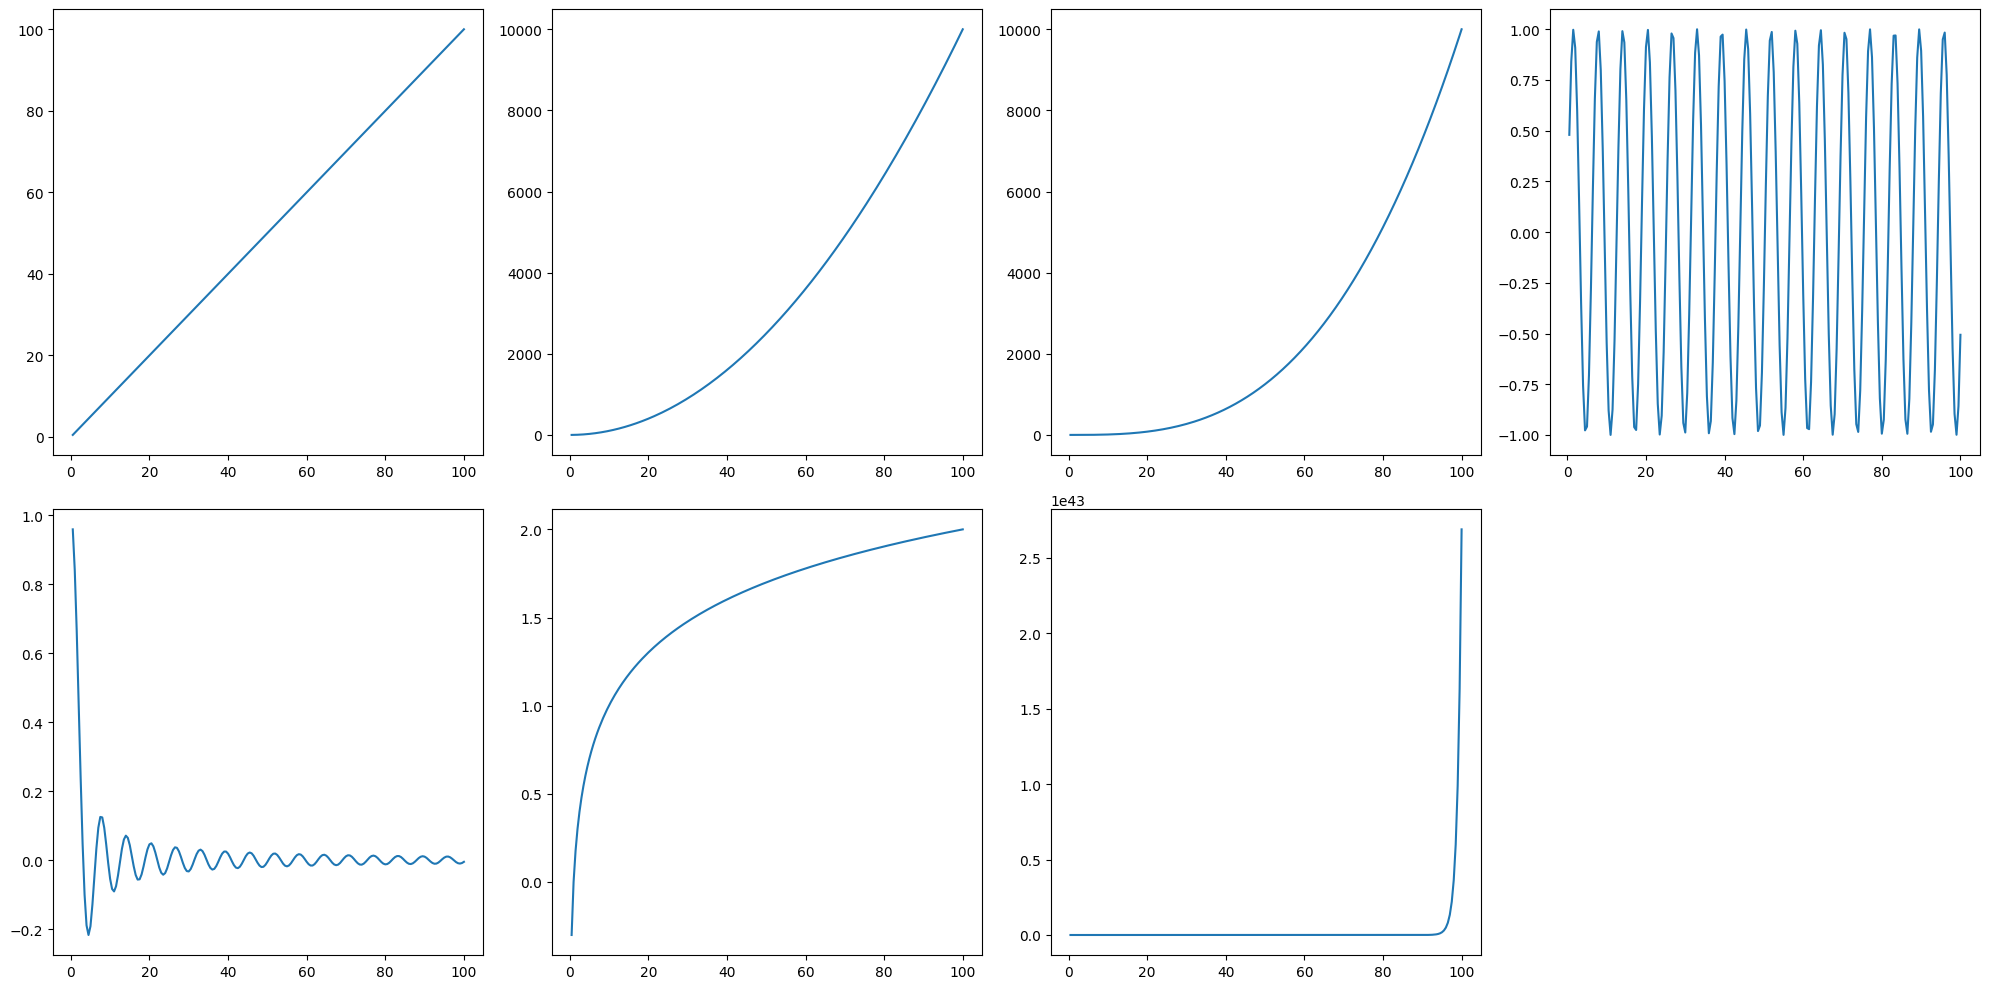

In [7]:
import matplotlib.pyplot as plt
import numpy as np


xs = np.linspace(0.5,100,int(1+(100-0.5)/0.5))
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(xs,xs)
plt.tight_layout()
plt.subplot(2,4,2)
plt.plot(xs,xs**2)
plt.tight_layout()
plt.subplot(2,4,3)
plt.plot(xs,xs**3/100)
plt.tight_layout()
plt.subplot(2,4,4)
plt.plot(xs,np.sin(xs))
plt.tight_layout()
plt.subplot(2,4,5)
plt.plot(xs,np.sin(xs)/xs)
plt.tight_layout()
plt.subplot(2,4,6)
plt.plot(xs,np.log10(xs))
plt.tight_layout()
plt.subplot(2,4,7)
plt.plot(xs,np.exp(xs))
plt.tight_layout()


### Q10. Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [8]:
import numpy as np
import pandas as pd
m = np.random.uniform(1,2,(20,5))
print(m)
cols = ['a','b','c','d','e']
df = pd.DataFrame(m,columns=cols)
print(df)
s = df.describe()
print()
print('Column with highest standard deviation:')
print(cols[s.loc['std',:].argmax()])
print()
print('Row with min mean')
print(df.iloc[df.mean(axis=1).argmin(),:])


[[1.35688879 1.58649765 1.83042483 1.06763031 1.28121852]
 [1.52704083 1.652936   1.04952665 1.72366892 1.35952836]
 [1.00445866 1.30564443 1.8962869  1.25501543 1.61001002]
 [1.31167408 1.60588396 1.18779326 1.35507364 1.42652897]
 [1.6639924  1.79745978 1.22536945 1.67957714 1.32593953]
 [1.56992061 1.09692608 1.30216743 1.99428987 1.14177466]
 [1.45733526 1.72798566 1.33608598 1.78284353 1.93635328]
 [1.51046323 1.95221861 1.39591669 1.906875   1.23055097]
 [1.68147084 1.06668773 1.04225553 1.37961574 1.88384775]
 [1.18596858 1.34361683 1.18055364 1.28290272 1.50675602]
 [1.49418896 1.196574   1.18089777 1.86050404 1.63406801]
 [1.65478088 1.6303944  1.69500819 1.04839675 1.5531406 ]
 [1.00542069 1.8267109  1.86316074 1.60812263 1.77112296]
 [1.06434288 1.65229136 1.79542499 1.83432446 1.85814928]
 [1.65070817 1.8986461  1.23465585 1.37778493 1.32120558]
 [1.50612507 1.82593537 1.85764771 1.47018496 1.90895204]
 [1.27724228 1.78731593 1.97988964 1.09604567 1.01460179]
 [1.31470761 1

### Q11.    Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [9]:
import numpy as np
import pandas as pd
m = np.random.uniform(1,2,(20,5))
cols = ['a','b','c','d','e']
df = pd.DataFrame(m,columns=cols)

df['f'] = df.sum(axis=1)
df['g'] = "GT8"
df.loc[df['f'] < 8,'g'] = "LT8"
print(df)
print()
print(df[df['g'] == "LT8"].shape[0])
print()
print('Standard deviation for column f for LT8 and GT8')
df.groupby('g')['f'].std()



           a         b         c         d         e         f    g
0   1.067406  1.698891  1.268519  1.128814  1.099944  6.263574  LT8
1   1.594743  1.191522  1.685427  1.805330  1.083369  7.360390  LT8
2   1.876915  1.064879  1.558859  1.645186  1.300957  7.446796  LT8
3   1.014010  1.721999  1.941743  1.652630  1.792741  8.123123  GT8
4   1.764262  1.789626  1.694473  1.091459  1.940540  8.280360  GT8
5   1.661840  1.492240  1.686817  1.456046  1.062245  7.359188  LT8
6   1.261554  1.617712  1.068478  1.156354  1.497632  6.601730  LT8
7   1.570483  1.608179  1.921517  1.761872  1.153716  8.015767  GT8
8   1.310340  1.748502  1.357091  1.722811  1.846434  7.985177  LT8
9   1.744027  1.095307  1.952454  1.639650  1.103112  7.534549  LT8
10  1.922127  1.237392  1.798430  1.223017  1.990359  8.171326  GT8
11  1.136548  1.363753  1.576594  1.196677  1.457686  6.731258  LT8
12  1.256989  1.976867  1.913488  1.356730  1.546207  8.050281  GT8
13  1.923066  1.457338  1.788475  1.971659  1.08

g
GT8    0.093275
LT8    0.623656
Name: f, dtype: float64

### Q12. Write a small piece of code to explain broadcasting in numpy.

In [22]:
import numpy as np

array_1d = np.array([1, 2, 3])
scalar = 5

result_1 = array_1d + scalar
print("Adding scalar to 1D array:")
print(result_1)
array_2d = np.array([[1, 2, 3], [4, 5, 6]])
array_1d = np.array([10, 20, 30])

result_2 = array_2d + array_1d
print("\nAdding 1D array to 2D array:")
print(result_2)

Adding scalar to 1D array:
[6 7 8]

Adding 1D array to 2D array:
[[11 22 33]
 [14 25 36]]


### Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [10]:
import numpy as np
arr = (np.random.rand(1,10)*5)[0]
print(arr)
print()
def argmin(arr):
  idxmin = 0
  valmin = arr[0]
  for i in range(len(arr)):
    if arr[i] < valmin:
      idxmin = i
      valmin = arr[i]
  return idxmin
print('Argmin:')
print(argmin(arr))
print(np.argmin(arr))
print('Are they equal?',argmin(arr) == np.argmin(arr))


[3.52813885 4.90470706 1.6771191  1.58609511 4.70255914 1.8835611
 3.34852168 0.05712221 0.2336235  2.59470533]

Argmin:
7
7
Are they equal? True
